# Clinical-microbiological characterisation of SARS-CoV-2 infection in the paediatric age

## Authors:

- Marc Garcia
- Jofre Poch
- Pau Tarragó
- Pau Matas
- Tomás Gadea

## Summary of steps for the project:
- **Exploratory Data Analysis (EDA)**: entendre les dades


- **Data Cleaning**: treure NULLs, eliminar dades no importants, etc.


- **Feature Selection**: escollir les variables explicatives que li passarem al model


- **Model selection**: Escollir un model classificador (té covid o no; si té covid => PCR, si no => pa casa)


- **Model training**: entrenar el model, és copiar 4 linies de codi xd


- **Model Validation**: Veure com de bé ho ha fet. Per exemple veient els square errors de valors predits vs resposta de veritat.


- **Parameter tunning**: Canviar els paràmetres per millorar el model validation.

## INITIAL DATA

In [2]:
import pandas as pd

In [3]:
path = './COPEDICATClinicSympt_DATA_2020-12-17_1642.csv'
df = pd.read_csv(path)
df.head()

,participant_id,id,sex,recruit_date,postal_code,province,family_country,row_school,bus,sports_type,...,other,flu_binary,flu_date,vaccines_binary,comorbidities_complete,final_classification_of_th,survey_end_date,name_initials_of_the_inter,comments,final_outcome_complete
0,1,HVH-0001-78,1.0,2020-11-09,08025,1.0,296.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,2.0,2020-11-09,ASA,NaN,2
1,2,HVH-0002-78,2.0,2020-11-14,08012,1.0,302.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,2.0,2020-11-14,ASA,NaN,2
2,3,HVH-0003-78,1.0,2020-11-16,NaN,1.0,314.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,1.0,2020-11-16,ASA,Amigdalitis estreptocòcica,2
3,4,HVH-0004-78,2.0,2020-11-30,NaN,1.0,416.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,2.0,2020-12-01,ASA,NaN,2
4,5,HVH-0005-78,2.0,2020-12-16,08016,1.0,269.0,NaN,2.0,NaN,...,NaN,0.0,NaN,1.0,2,1.0,2020-12-16,ASA,NaN,2


## CLEANED AND SUMMERIZED DATA

In [5]:
data = pd.read_csv("clean_data.csv")
data.head()

,sex,province,family_country,smokers_home,survey_type,inclusion_criteria,sympt_epi,housemember_symptoms___1,housemember_symptoms___2,housemember_symptoms___3,...,vih_others___2,vih_others___3,other,flu_binary,flu_date,vaccines_binary,comorbidities_complete,final_classification_of_th,survey_end_date,final_outcome_complete
0,1.0,1.0,296.0,2.0,2.0,1.0,0.0,0,0,0,...,0,0,3.0,0.0,0,1.0,2,2.0,0,2
1,2.0,1.0,302.0,2.0,2.0,1.0,0.0,0,0,0,...,0,0,3.0,0.0,0,1.0,2,2.0,0,2
2,1.0,1.0,314.0,2.0,2.0,1.0,0.0,0,0,0,...,0,0,3.0,0.0,0,1.0,2,1.0,0,2
3,2.0,1.0,416.0,2.0,2.0,1.0,0.0,0,0,0,...,0,0,3.0,0.0,0,1.0,2,2.0,0,2
4,2.0,1.0,269.0,2.0,2.0,1.0,1.0,0,1,0,...,0,0,3.0,0.0,0,1.0,2,1.0,0,2


In [6]:
diagnosis = pd.read_csv("diagnosis_data.csv")
diagnosis.head()

,final_diagnosis_code
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0


In [7]:
%matplotlib notebook
import PediatricAgeGraphics as pag

features:
['province', 'family_country', 'smokers_home', 'survey_type', 'inclusion_criteria', 'sympt_epi', 'housemember_symptoms___1', 'housemember_symptoms___2', 'housemember_symptoms___3', 'housemember_symptoms___4', 'housemember_symptoms___5', 'home_confirmed', 'school_symptoms', 'school_symptoms_member___1', 'school_symptoms_member___2', 'school_symptoms_member___5', 'school_confirmed', 'symptoms_binary', 'fever', 'dysphonia', 'resp', 'tachypnea', 'ausc_resp', 'odynophagia', 'fatiga', 'fatigue_first', 'headache', 'conjuntivitis', 'dyarrea', 'splenomegaly', 'neuro', 'confusion', 'taste_first', 'smell', 'sero_response', 'sat_hb_o2_value', 'other', 'vaccines_binary', 'comorbidities_complete']


924
616
Random forest accuracy: 0.9074675325
MAE: 0.18506493506493507
Accuracy: 0.91 (+/- 0.04)


<IPython.core.display.Javascript object>


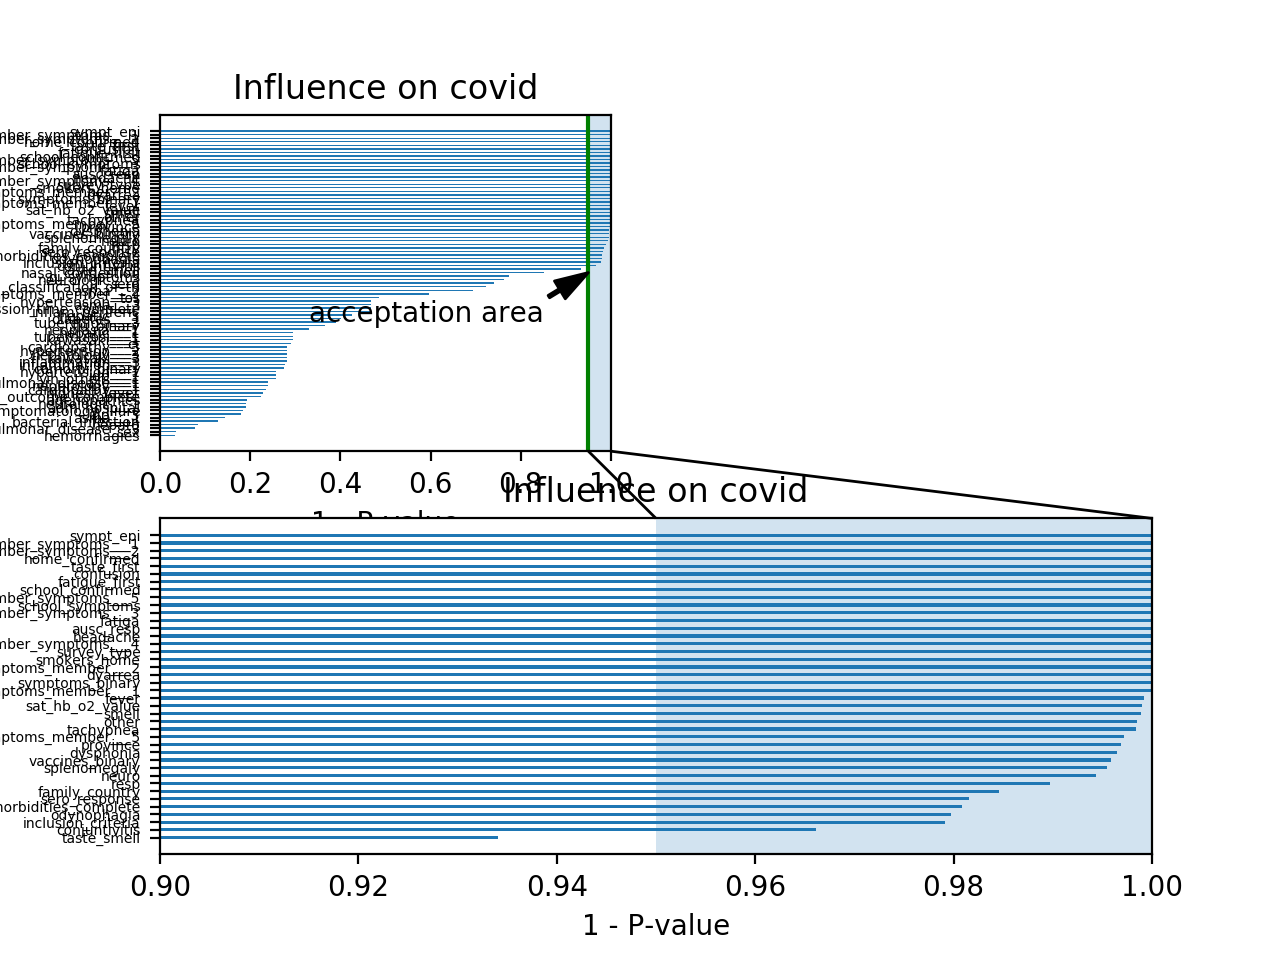

In [8]:
pag.hbarImpactfulVariables()